# Task 1: Creating Your Dataset

In [5]:
# We only need the following librairies

import pandas as pd
#import Altair as alt
import string
import csv
import ndjson

In [97]:
path = "./data/Video_Games_5.json"
with open(path) as f:
    data =  ndjson.load(f)

In [98]:
df_review = pd.DataFrame(data).reset_index(drop = True)

In [99]:
#df_review.head(5)
print (df_review.keys())
print (df_review.head(10))
df_review['overall'].describe()

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')
   overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  10 17, 2015  A1HP7NVNPFMA4N  0700026657   
1      4.0     False  07 27, 2015  A1JGAP0185YJI6  0700026657   
2      3.0      True  02 23, 2015  A1YJWEXHQBWK2B  0700026657   
3      2.0      True  02 20, 2015  A2204E1TH211HT  0700026657   
4      5.0      True  12 25, 2014  A2RF5B5H74JLPE  0700026657   
5      4.0      True  11 13, 2014  A11V6ZJ2FVQY1D  0700026657   
6      1.0     False   08 2, 2014  A1KXJ1ELZIU05C  0700026657   
7      5.0      True   03 3, 2014  A1WK5I4874S3O2  0700026657   
8      5.0      True  02 21, 2014   AV969NA4CBP10  0700026657   
9      4.0      True  06 27, 2013  A1EO9BFUHTGWKZ  0700026657   

        reviewerName                                         reviewText  \
0        Ambrosia075 

count    497577.000000
mean          4.220456
std           1.185424
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

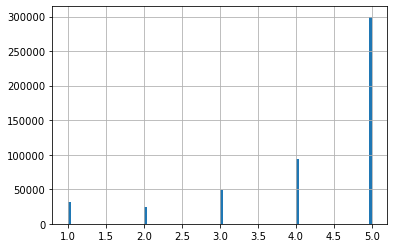

In [100]:
df_review.overall.hist(bins = 100)

In [48]:
df_review.overall.count()

497577

And start creating the datasets.

In [116]:
# ToDo sklearn imbalance ...
small_corpus = pd.DataFrame(df_review[df_review['overall']==1.0].sample(1500))
small_corpus = small_corpus.append(pd.DataFrame(df_review[df_review['overall']==2.0].sample(500)))
small_corpus = small_corpus.append(pd.DataFrame(df_review[df_review['overall']==3.0].sample(500)))
small_corpus = small_corpus.append(pd.DataFrame(df_review[df_review['overall']==4.0].sample(500)))
small_corpus = small_corpus.append(pd.DataFrame(df_review[df_review['overall']==5.0].sample(1500)))

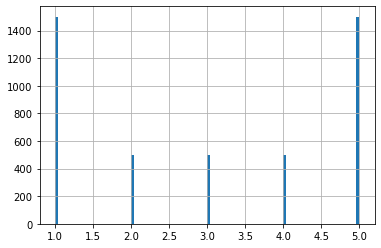

In [117]:
small_corpus.overall.hist(bins = 100)

In [118]:
small_corpus.reviewText.head(10)

71575     Just didn't work...followed the directions and...
365563    Dont support censorship that's only there to p...
486239    I bought this game last year and loved it. I i...
190855    Before you buy it do a search on the "Red Ring...
412037    The controls are terrible. Don't like this gam...
397555                                             bad game
497208    I couldn't finish this is was so bad. Graphics...
190563    Lets just start out by saying Good game....POO...
213813    I usually think the ranting reviews of Madden ...
69639     The game itself is an acceptable try at a tact...
Name: reviewText, dtype: object

In [119]:
small_corpus.loc[71575]

overall                                                           1
verified                                                       True
reviewTime                                              11 28, 2012
reviewerID                                           A2W1MGWDVG5BCL
asin                                                     B000A3IA0Y
reviewerName                                             Lauri Maki
reviewText        Just didn't work...followed the directions and...
summary                                                didn't work.
unixReviewTime                                           1354060800
vote                                                            NaN
style                                                           NaN
image                                                           NaN
Name: 71575, dtype: object

In [107]:
import numpy as np
seed = 42
np.random.seed(seed)
samples = np.random.randint (1, df_review.overall.count(), size=100000)

In [108]:
large_corpus = df_review.loc[samples]

100000


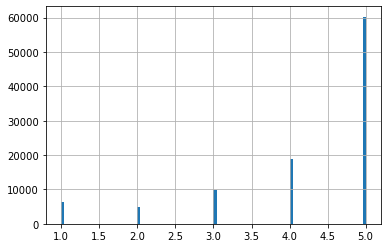

In [109]:
print (large_corpus.overall.count())
large_corpus.overall.hist(bins = 100)

In [133]:
small_corpora = pd.DataFrame(small_corpus['overall']).rename(columns={'overall':'ratings'})
small_corpora['reviews'] = pd.Series(small_corpus['reviewText'])
print (small_corpora.keys())
small_corpora.head(50)

Index(['ratings', 'reviews'], dtype='object')


,ratings,reviews
71575,1.0,Just didn't work...followed the directions and...
365563,1.0,Dont support censorship that's only there to p...
486239,1.0,I bought this game last year and loved it. I i...
190855,1.0,"Before you buy it do a search on the ""Red Ring..."
412037,1.0,The controls are terrible. Don't like this gam...
397555,1.0,bad game
497208,1.0,I couldn't finish this is was so bad. Graphics...
190563,1.0,Lets just start out by saying Good game....POO...
213813,1.0,I usually think the ranting reviews of Madden ...
69639,1.0,The game itself is an acceptable try at a tact...


In [132]:
small_corpora.loc[71575]

ratings                                                    1
reviews    Just didn't work...followed the directions and...
Name: 71575, dtype: object

In [134]:
large_corpora = pd.DataFrame(large_corpus['overall']).rename(columns={'overall':'ratings'})
large_corpora['reviews'] = pd.Series(large_corpus['reviewText'])
print (large_corpora.keys())
large_corpora.head(50)

Index(['ratings', 'reviews'], dtype='object')


,ratings,reviews
121959,1.0,When I got this item it was not packaged well ...
146868,1.0,I was very disappointed by how little there is...
131933,5.0,I bought this game as other people commented i...
365839,5.0,Despite everybody criticizing Mario constantly...
259179,5.0,Wow. This is so much better than the earlier g...
119880,3.0,Bought this for my 6 year old because she real...
110269,1.0,This game has so many modes of copyright prote...
207893,5.0,I'm happy whit my product:3
54887,5.0,"I've had this gaming pad for about a year now,..."
137338,5.0,One of the best games I've played in my life ....


In [137]:
#small_corpora.to_csv('small_corpus.cvs', quoting = csv.QUOTE_ALL, index = False)
small_corpora.to_csv('small_corpus.cvs', quoting = csv.QUOTE_ALL)

In [138]:
#small_corpora.to_csv('small_corpus.cvs', quoting = csv.QUOTE_ALL, index = False)
large_corpora.to_csv('large_corpus.cvs', quoting = csv.QUOTE_ALL)